# ACT Report
Raul Armendariz

This analysis will focus on the data gathered from the WeRateDogs twitter archive along with data from other sources, where we merged data from a neural network that can make a guess on what breed of dog is present in a tweet from this twitter account, and other information such as retweet and like count along with what rating that each user gives to the dog that they posted to the twitter account. 

First off, lets look at the most common ratings that users give to their dogs. The rating convention that is used for the WeRateDogs twitter account is that a dog is rated on a scale of a number out of 10, where it isn't uncommon for a dog to be rated above 10/10 and is usually encouraged since dogs are great.

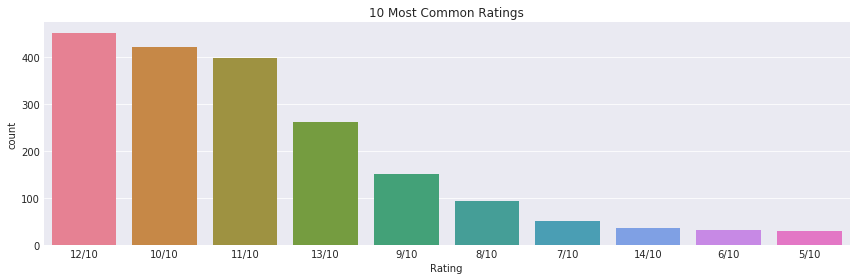

In [4]:
plt.figure(figsize=(12,4))
sns.countplot(t_master.rating, order=t_master.rating.value_counts().iloc[:10].index, palette= 'husl', )
plt.xlabel('Rating')
plt.title('10 Most Common Ratings')
plt.tight_layout()

We can see that most users rate their dogs between 13/10 and 10/10, where the majority of users rate their dogs 12/10. Could be that people are more comfortable giving the dog a rating above 10 but not too high. We can also see that some users did rate their dogs below 10/10, which could be for a number of reasons. One reason could be that the twitter user that posted the photo wasn't entirely sure of the common rating convention used when rating dogs. Another reason could be that the quality of the data pulled from the twitter archives wasn't accurate, which would require a bit of digging into.

Now lets take a look at another feature of the data: how many times were the dogs retweeted.

Descriptive Stats of Retweet Count 
count     1991.000000
mean      2733.593672
std       4717.938961
min         13.000000
25%        612.500000
50%       1318.000000
75%       3139.000000
max      77707.000000
Name: retweet_count, dtype: float64


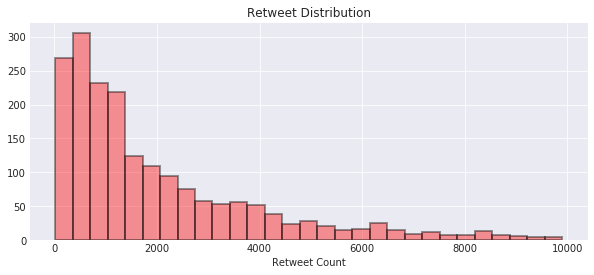

In [81]:
retweet_count_limited = t_master[t_master['retweet_count'] <= 10000]

plt.figure(figsize=(10,4))
sns.distplot(retweet_count_limited['retweet_count'], kde = False, color='red',
             hist_kws=dict(edgecolor="k", linewidth=2) )
plt.xlabel('Retweet Count')
plt.title('Retweet Distribution')
print('Descriptive Stats of Retweet Count \n' + str(t_master.retweet_count.describe()))

From the above distribution, we can see that the majority of the tweets were retweeted less than 3000 times. However we do see that some tweets were retweeted a large amount of times, one of them was even retweeted more than 77700 times! This could be that some of the tweets are a bit older and therefore had some time to accumulate more retweets. Or it could be that some of the more retweeted dogs are really cute and are therefore more popular


Now the data that we looked at also classified dogs based on their looks/personality, which consitsts of doggos, puppos, puppers, and floofers. According to the definitions of them, doggos are a bit older and more mature, puppos are "teenage" dogs, puppers are puppies or dogs with puppy like personalities, and floofers are basically any kind of dog that is especially fluffy. Lets take a look at how many dogs fall under each category.

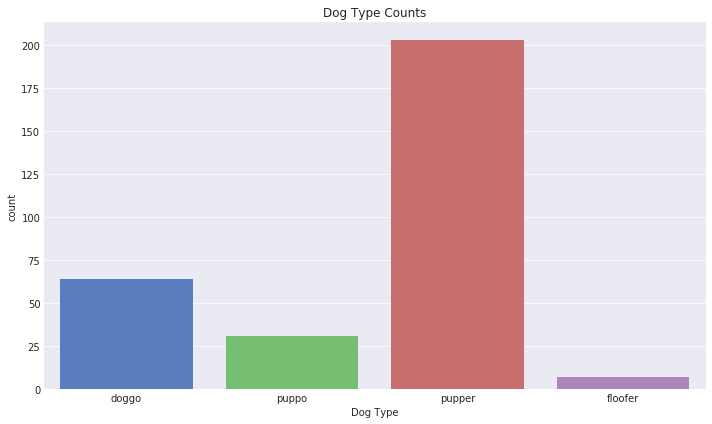

In [83]:
dog_typesNotNull = t_master[(t_master['dog_type'] != 'None') & 
                            (t_master['dog_type'] != 'doggo/floofer')]


plt.figure(figsize=(10,6))
sns.countplot(dog_typesNotNull['dog_type'], palette = 'muted')
plt.xlabel('Dog Type')
plt.title('Dog Type Counts')
plt.tight_layout()

We can see that many dogs weren't classified based on this convention, but the ones that were classified were overwhelmingly puppers. From this, we can assume that the most common type of dog that gets posted for ratings are puppers. Floofers are not very prevalent in the dataset, which could be that people don't necessarily use floofer and use another classifier for their dogs.

Now finally, lets look at the neural network algorithm that was used to detect dog breeds. The neural network algorithm classified dog breeds based on the image data from each individual tweet, where each tweet could have up to 4 images associated with it. The algorithm would then give 3 predictions, where its number 1 prediction would typically be the most accurate and would give a score on its confidence of the dog breed. The resulting distribution of the confidence scores are below:

Descriptive Stats of p1 confidence 
count    1991.000000
mean        0.593676
std         0.271945
min         0.044333
25%         0.362716
50%         0.587507
75%         0.844583
max         1.000000
Name: p1_conf, dtype: float64


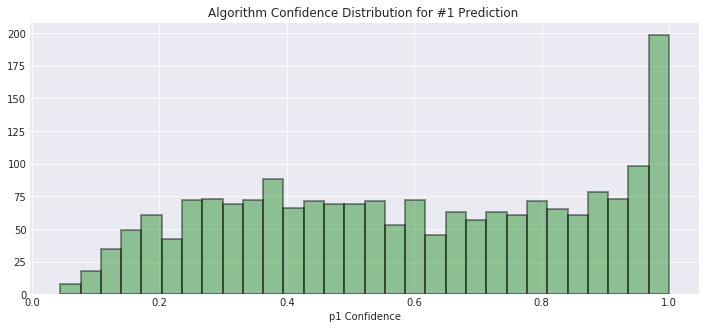

In [82]:
plt.figure(figsize=(12,5))
sns.distplot(t_master.p1_conf, kde=False, bins = 30, color='green',
             hist_kws=dict(edgecolor="k", linewidth=2) )
plt.xlabel('p1 Confidence')
plt.title('Algorithm Confidence Distribution for #1 Prediction ')
print('Descriptive Stats of p1 confidence \n' + str(t_master.p1_conf.describe()))

As we can see, there are a good amount of predictions above 80% where the algorithm was pretty confident in predicting the dog breed. However, there are a lot of predictions where the confidence level was pretty low and since this is the number one prediction, one could assume that the other predictions were much less confident. Seeing this distribution of scores leads one to believe that more work could be done in terms of training the algorithm to recognize dog breeds better. Perhaps more feature engineering needs to be done to the data in order to be able to make a better prediction.

There are definitely more insights to be had from the data that we gathered and can definitely be explored in the future by acquiring more data and reiterating on previous work.